2026-01-28 09:01:50.683488: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2026-01-28 09:01:50.683545: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2026-01-28 09:01:50.683566: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2026-01-28 09:01:50.689792: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2026-01-28 09:01:51.426701: W tensorflow/compiler/


TESTING MODEL: model3


2026-01-28 09:01:52.741702: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:09:00.0/numa_node
Your kernel may have been built without NUMA support.
2026-01-28 09:01:52.777428: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:09:00.0/numa_node
Your kernel may have been built without NUMA support.
2026-01-28 09:01:52.777480: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:09:00.0/numa_node
Your kernel may have been built without NUMA support.
2026-01-28 09:01:52.780068: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:09:00.0/numa_node
Your kernel may have been built without NUMA support.
2026-01-28 09:01:52.780114: I tensorflow/compile

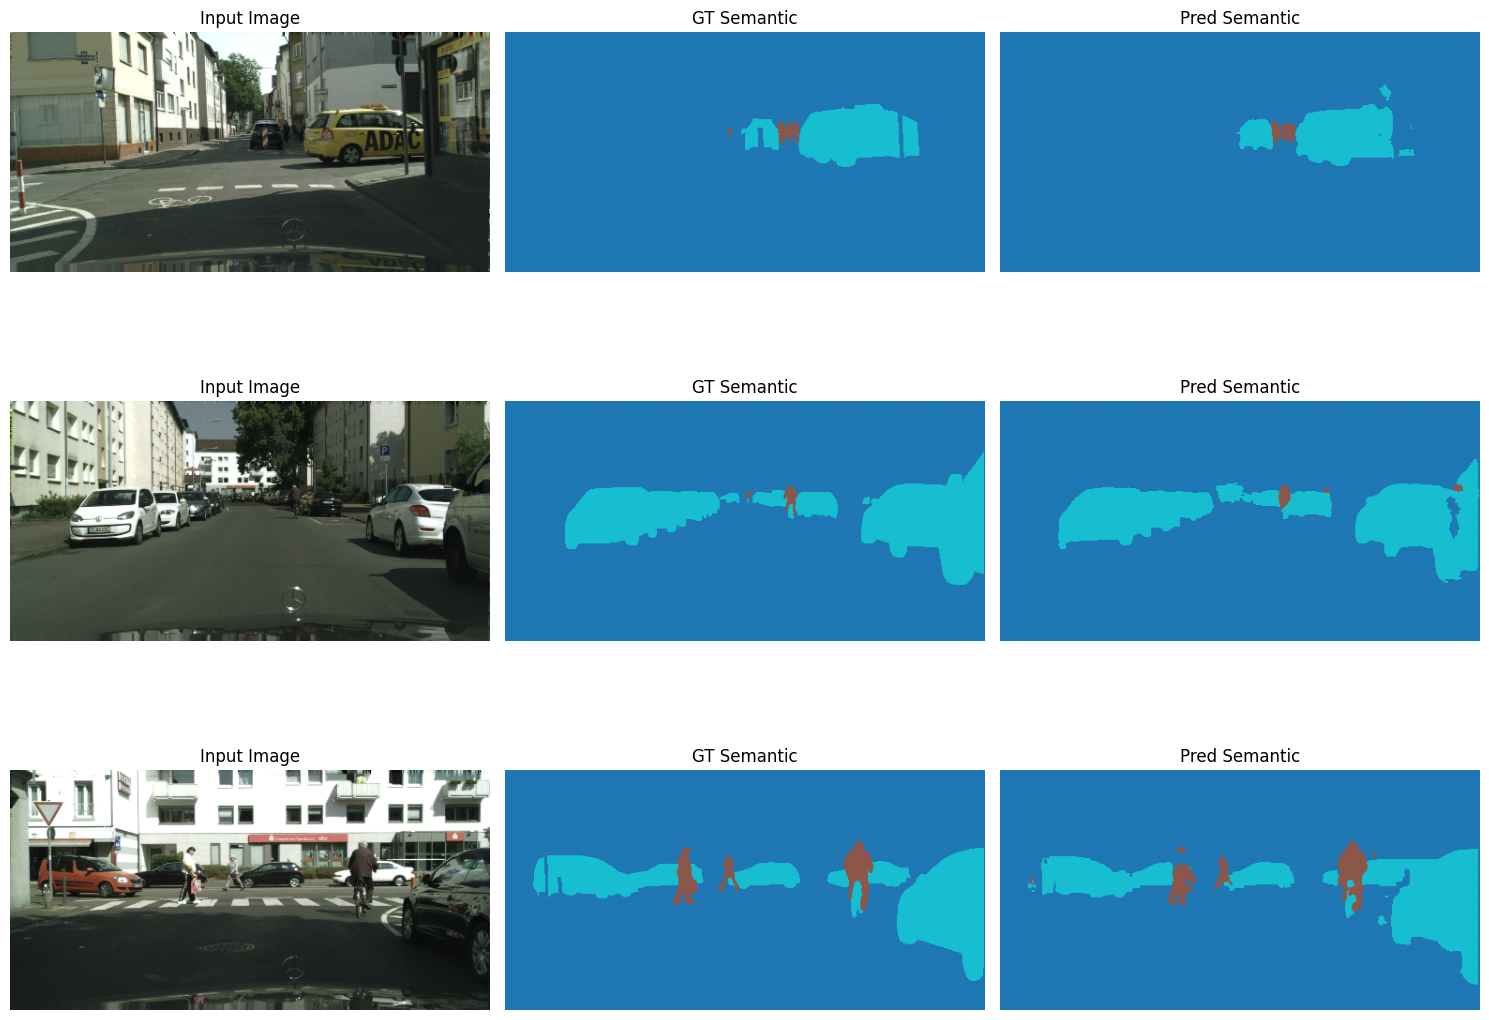

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

import utils.config as config
from utils.datasets import build_dataset
from models.registry import MODELS_REGISTRY

def test_and_visualize(model_name, num_samples=3, model_path=None):
    print(f"\n{'='*60}")
    print(f"TESTING MODEL: {model_name}")
    print('='*60)

    if model_path==None:
        model_path = f"saved_models/testing_architecture/{model_name}_best.h5"
    if not os.path.exists(model_path):
        print(f"❌ Model not found: {model_path}")
        return

    model = tf.keras.models.load_model(model_path, compile=False)

    test_ds = build_dataset(
        config.VAL_X,
        config.VAL_Y,
        batch_size=1,
        shuffle=False,
        augment=False
    )

    test_samples = list(test_ds.take(num_samples).as_numpy_iterator())
    fig, axes = plt.subplots(num_samples, 3, figsize=(15, 4*num_samples))
    if num_samples == 1:
        axes = axes.reshape(1, -1)

    for i, (image, gt_semantic) in enumerate(test_samples):
        img = image[0]
        gt_sem = gt_semantic[0]

        pred = model.predict(image, verbose=0)
        if isinstance(pred, dict):
            pred_sem = np.argmax(pred['semantic'][0], axis=-1)
        else:
            pred_sem = np.argmax(pred[0], axis=-1)

        axes[i, 0].imshow(img)
        axes[i, 0].set_title("Input Image")
        axes[i, 0].axis('off')

        axes[i, 1].imshow(gt_sem, cmap='tab10', vmin=0, vmax=2)
        axes[i, 1].set_title("GT Semantic")
        axes[i, 1].axis('off')

        axes[i, 2].imshow(pred_sem, cmap='tab10', vmin=0, vmax=2)
        axes[i, 2].set_title("Pred Semantic")
        axes[i, 2].axis('off')

    plt.tight_layout()
    plt.savefig(f"saved_models/{model_name}_test_results.png", dpi=150, bbox_inches='tight')
    plt.show()

test_and_visualize(model_name='model3', num_samples=3,model_path = f"saved_models/final_model/model3_best.h5")



Loading training history for model: model1
📈 Training History:

Loading training history for model: model2
📈 Training History:

Loading training history for model: model3
📈 Training History:


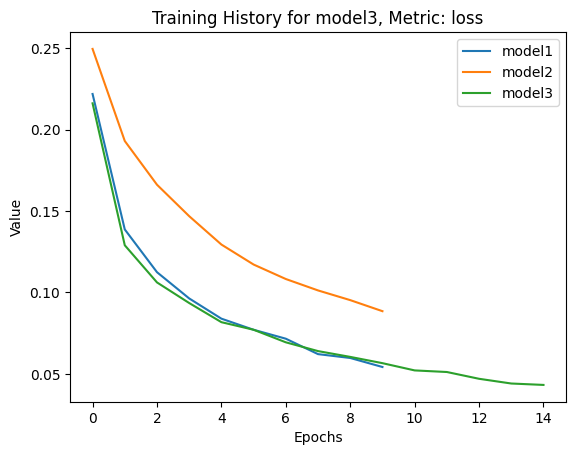

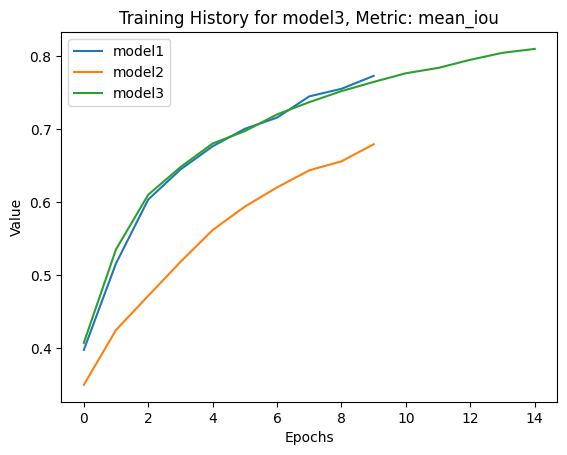

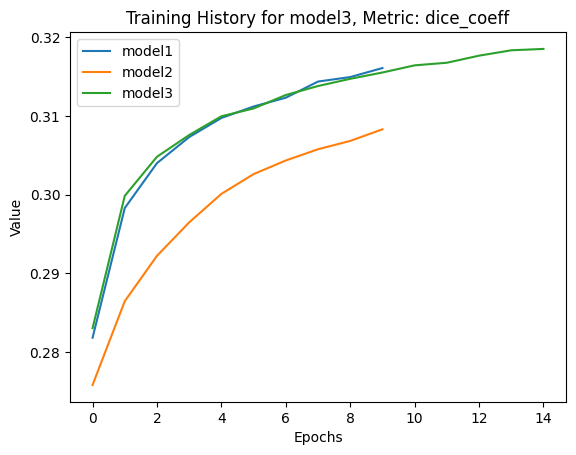

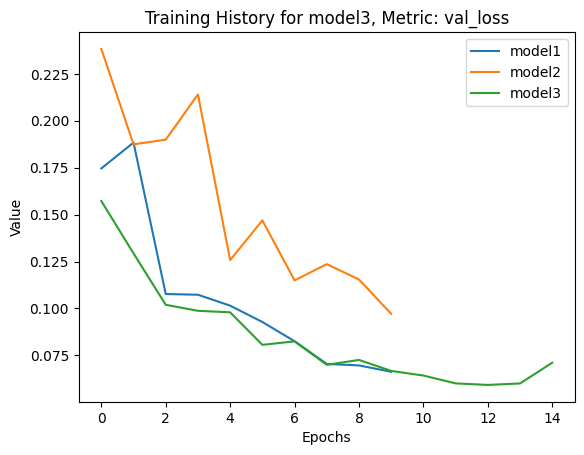

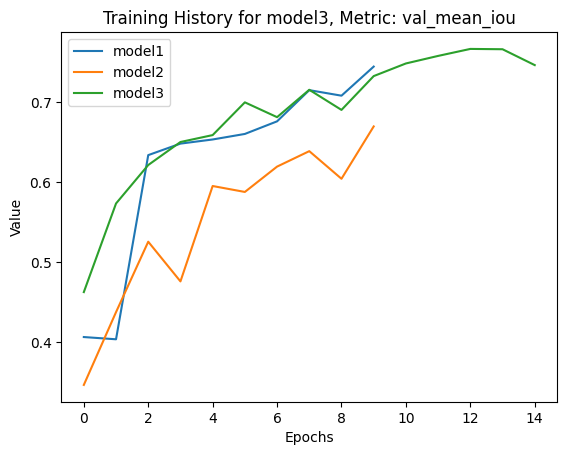

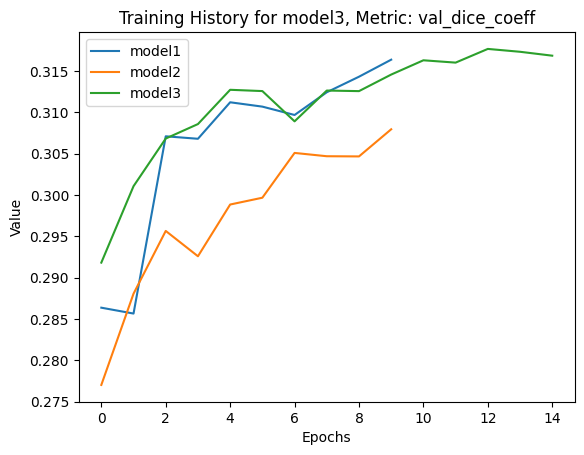

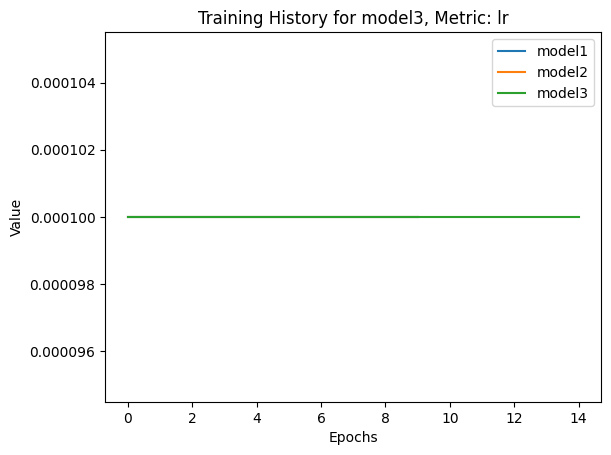

In [5]:
import json

history_data = {}

for model_name in MODELS_REGISTRY.keys():
    history_file = f"saved_models/testing_architecture/{model_name}_history.json"
    print(f"\nLoading training history for model: {model_name}")
    if os.path.exists(history_file):
        history = json.load(open(history_file, 'r'))
        print("📈 Training History:")
        history_data[model_name] = history
    else:
        print(f"❌ History file not found: {history_file}")

for key in history_data[list(history_data.keys())[0]].keys():
    for model in history_data.keys():
        plt.plot(history_data[model][key], label=model)
    plt.title(f'Training History for {model_name}, Metric: {key}')
    plt.xlabel('Epochs')
    plt.ylabel('Value')
    plt.legend()
    plt.show()


Loading training history for model: model1
📈 Loaded

Loading training history for model: model2
📈 Loaded

Loading training history for model: model3
📈 Loaded


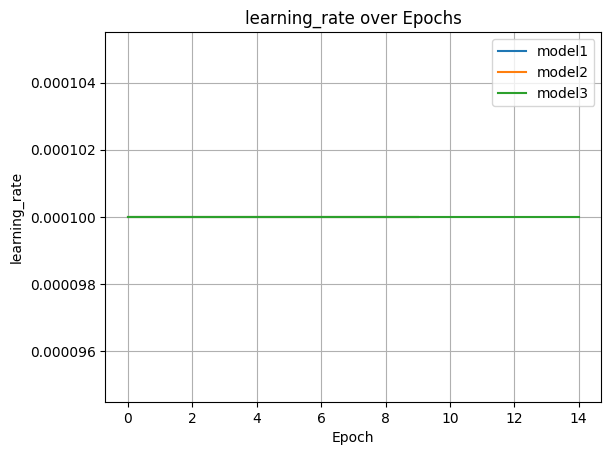

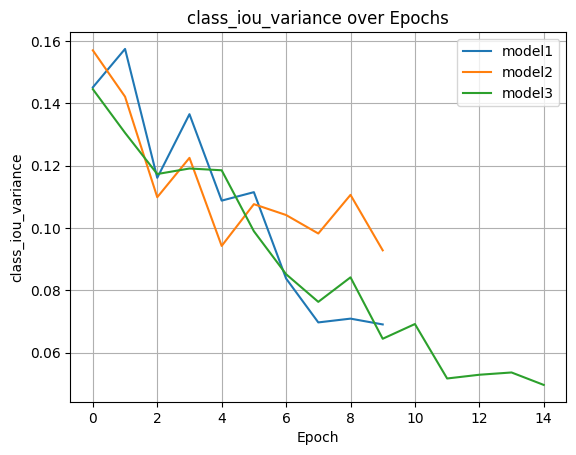

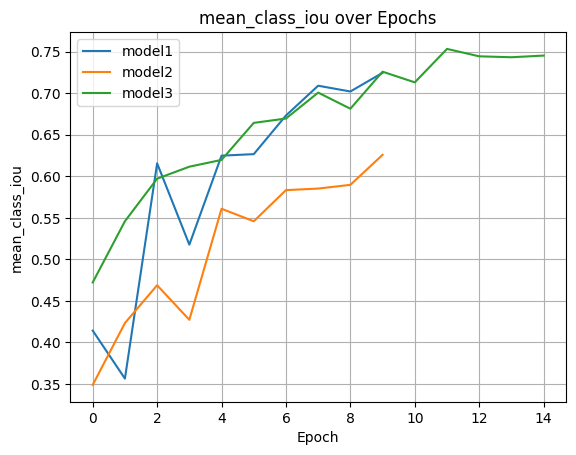

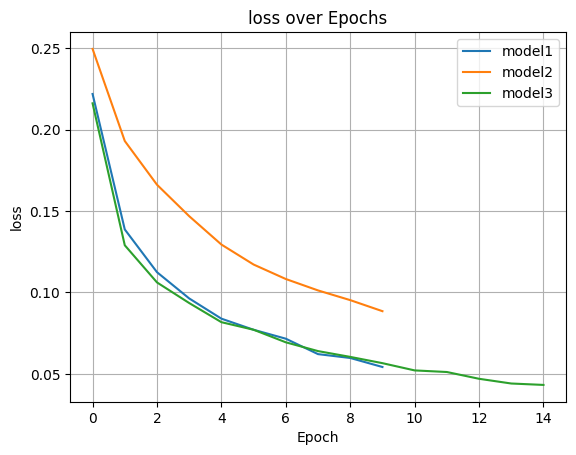

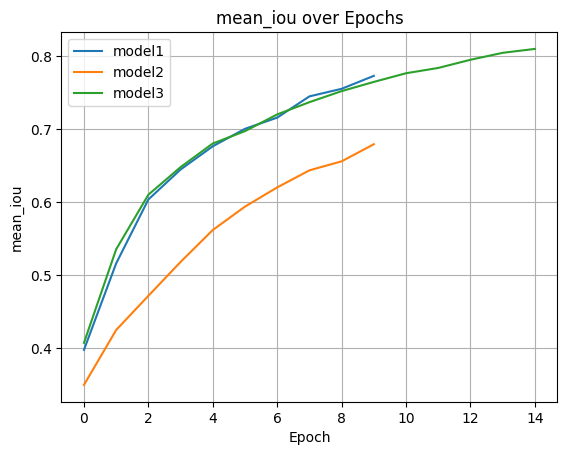

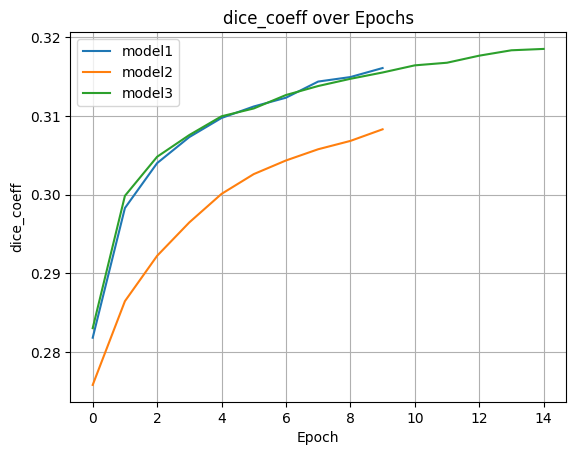

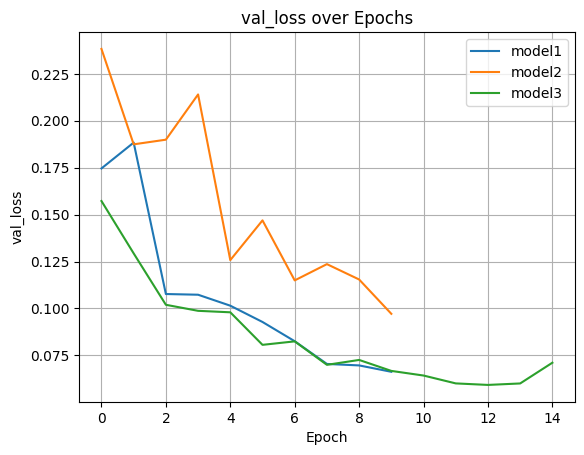

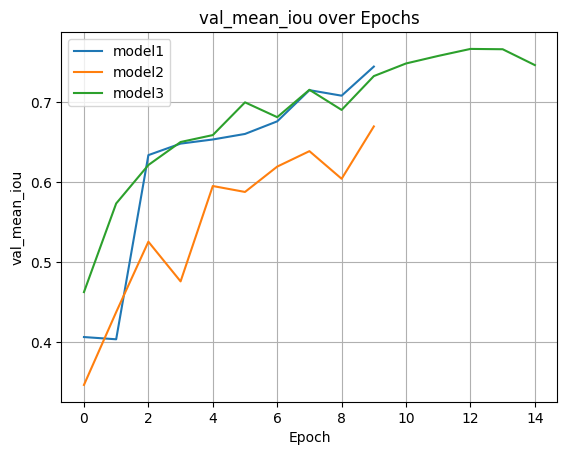

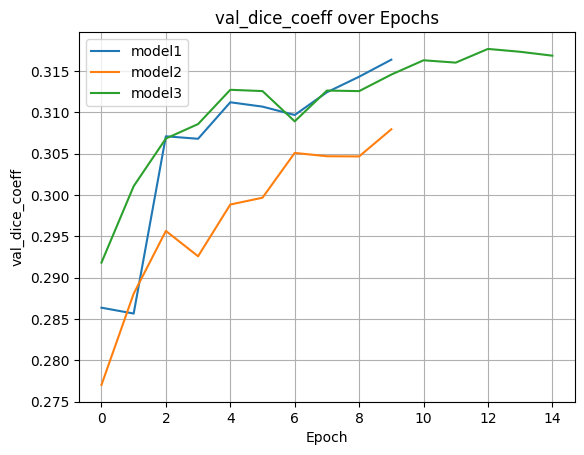

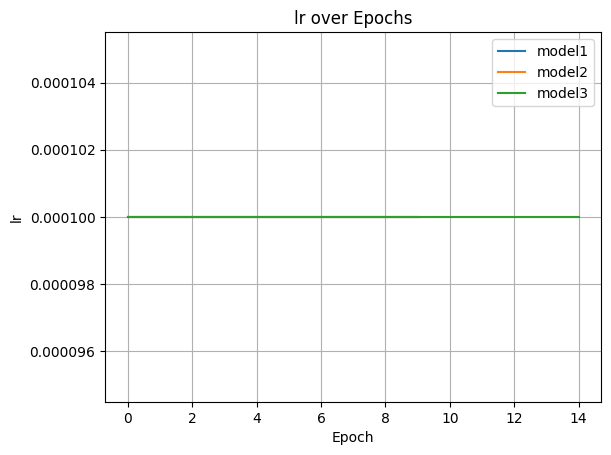

In [3]:
import os
import json
import matplotlib.pyplot as plt
from models.registry import MODELS_REGISTRY

history_data = {}
for model_name in MODELS_REGISTRY.keys():
    history_file = f"saved_models/testing_architecture/{model_name}_dynamics.json"
    print(f"\nLoading training history for model: {model_name}")

    if os.path.exists(history_file):
        with open(history_file, "r") as f:
            data = json.load(f)
            history_data[model_name] = data["epoch_metrics"]
        print("📈 Loaded")
    else:
        print(f"❌ History file not found: {history_file}")

example_metrics = history_data[list(history_data.keys())[0]][0].keys()
metrics = [m for m in example_metrics if m != "epoch"]

for metric in metrics:
    plt.figure()
    for model_name, epochs in history_data.items():
        values = [e[metric] for e in epochs if metric in e]
        plt.plot(values, label=model_name)

    plt.title(f"{metric} over Epochs")
    plt.xlabel("Epoch")
    plt.ylabel(metric)
    plt.legend()
    plt.grid(True)
    plt.show()
